In [6]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('train.csv')

In [4]:
def describe(df):
  desc=pd.DataFrame()
  desc['dtype']=df.dtypes
  desc['null']=df.isnull().sum()
  desc['%null'] = desc['null'] / len(df) * 100
  # desc['mean']=df.mean()
  # desc['median']=df.median()
  #desc['%unique'] = desc['nunique'] /len(df)*100
  desc = pd.concat([desc,df.describe(include = 'all').T],axis=1).sort_values(by='null',ascending=False)
  desc['count']=df.count()
  desc['unique']=df.nunique()
  # desc['freq/mean']=desc['freq'].fillna(desc['mean']).drop(['freq','mean'],axis=1)
  display(desc)
describe(train)

,dtype,null,%null,count,mean,std,min,25%,50%,75%,max,unique
id,int64,0,0.0,2190,1094.500000,632.342866,0.0,547.250,1094.50,1641.750,2189.0,2190
day,int64,0,0.0,2190,179.948402,105.203592,1.0,89.000,178.50,270.000,365.0,365
pressure,float64,0,0.0,2190,1013.602146,5.655366,999.0,1008.600,1013.00,1017.775,1034.6,236
maxtemp,float64,0,0.0,2190,26.365799,5.654330,10.4,21.300,27.80,31.200,36.0,219
temparature,float64,0,0.0,2190,23.953059,5.222410,7.4,19.300,25.50,28.400,31.5,198
mintemp,float64,0,0.0,2190,22.170091,5.059120,4.0,17.700,23.85,26.400,29.8,199
dewpoint,float64,0,0.0,2190,20.454566,5.288406,-0.3,16.800,22.15,25.000,26.7,218
humidity,float64,0,0.0,2190,82.036530,7.800654,39.0,77.000,82.00,88.000,98.0,49
cloud,float64,0,0.0,2190,75.721918,18.026498,2.0,69.000,83.00,88.000,100.0,78
sunshine,float64,0,0.0,2190,3.744429,3.626327,0.0,0.400,2.40,6.800,12.1,120


In [65]:
train.shape

(2190, 13)

In [67]:
k=0
for i in range(1,366):
    c=train[train['day']==i]['id'].count()
    if c  < 6:
        display(train[train['day']==i])
        break

        k+=1
print(k)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
37,37,38,1021.8,21.1,18.2,17.8,16.9,74.0,44.0,9.5,20.0,26.7,0
402,402,38,1013.0,24.5,22.8,20.9,20.3,86.0,92.0,0.0,70.0,15.7,1
767,767,38,1020.6,21.2,18.2,17.3,14.6,79.0,83.0,2.2,20.0,17.3,1
1497,1497,38,1020.2,21.2,18.9,17.2,15.0,74.0,35.0,9.8,30.0,18.6,0
1862,1862,38,1020.6,25.1,21.8,19.2,16.4,71.0,88.0,0.6,20.0,40.0,1


0


In [100]:
k=0
# for i in range(1,366):
#     c=train[train['day']==i]['id'].count()
#     if c == 8:
#         display(train[train['day']==i])

#         k+=1
# print(k)
for i in range(0,366):
    for j in range(0,8):
        if train[(train["id"]==j*365 + i) & (train['day']==i+1)].empty:
           k+=1
           if  train[train["id"]==j*365 + i].empty:
            train.loc[train["id"] == j*365 + i, "error"] = "group_1"
            continue
           else:
            # display(train[train["id"]==j*365 + i])
            train.loc[train["id"] == j*365 + i, "error"] = "group_2"
            train.loc[train["id"] == j*365 + i, "day"] =i+1
            k+=1
print(k)
print(train['error'].fillna(value="group_1" ,inplace=True))




813
None


In [96]:
print(train['error'].isna().sum())


0


In [ ]:
# @title continous feature disturbutions
def target3_plot(column,train,):
      import warnings
      warnings.filterwarnings("ignore")
      hue_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
      fig, axes = plt.subplots(1, 2, figsize=(14, 4))  # Create subplots with 1 row and 2 columns

      # Plot histogram with hue
      sns.histplot(data=train, x=column, hue_order=hue_columns, bins=50, kde=True, ax=axes[0])
      axes[0].set_title(f'Histogram of {column} with Hue')
      axes[0].set_xlabel(column)
      axes[0].set_ylabel('Count')
      # axes[0].legend(title='Fault Types', loc='upper right',fontsize="x-large")

      # Plot KDE plot with hue
      sns.kdeplot(data=train, x=column, shade=True,hue_order=hue_columns, ax=axes[1])
      axes[1].set_title(f'KDE Plot of {column} with Hue')
      axes[1].set_xlabel(column)
      axes[1].set_ylabel('Density')
      # axes[1].legend(title='Fault Types', loc='upper right',fontsize="x-large")

      plt.tight_layout()  # Adjust spacing between subplots
      plt.show()

for i in train.columns:
   target3_plot(i,train)


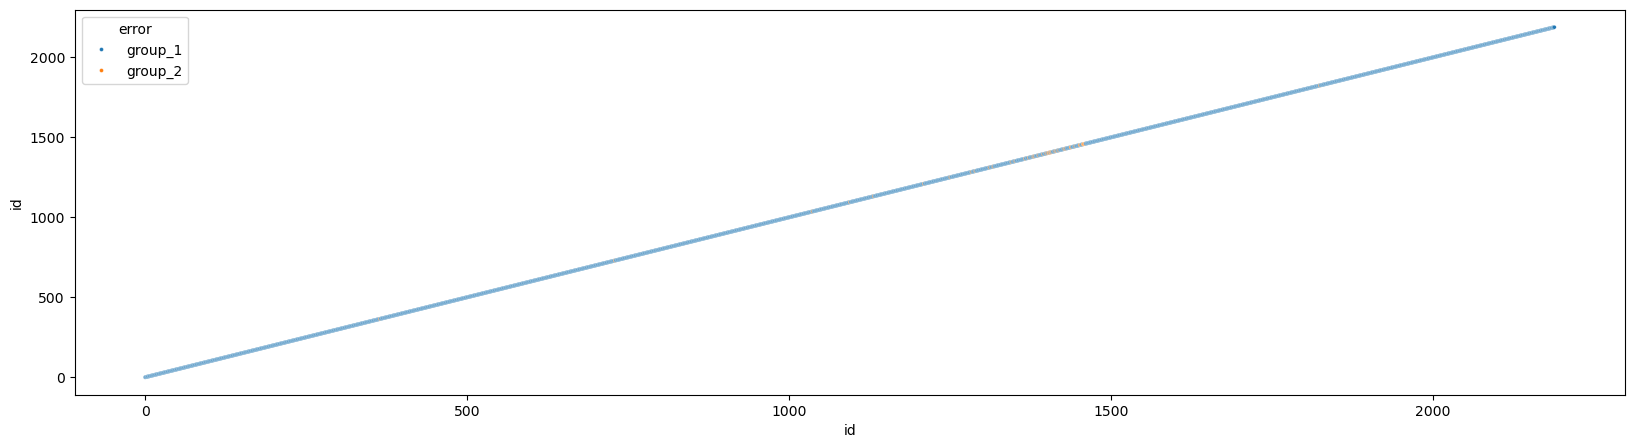

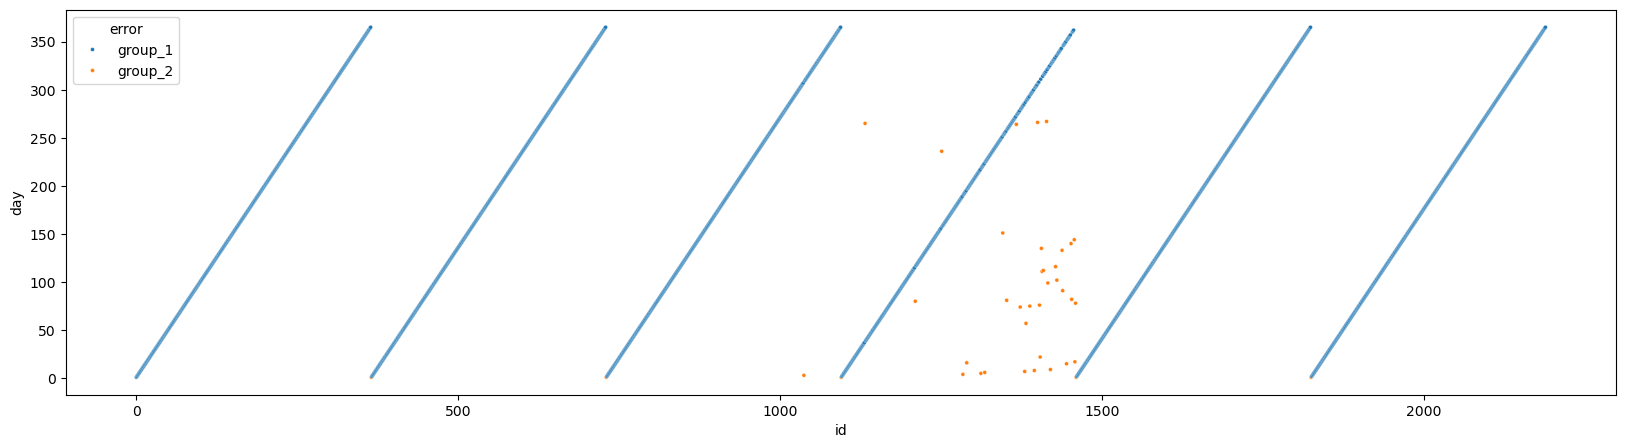

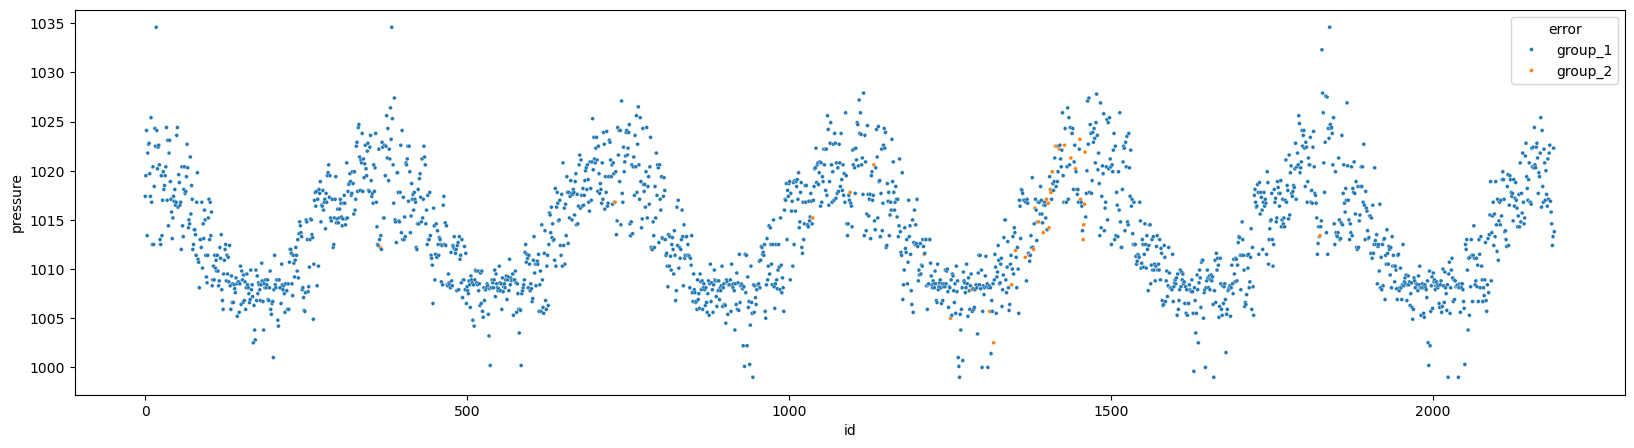

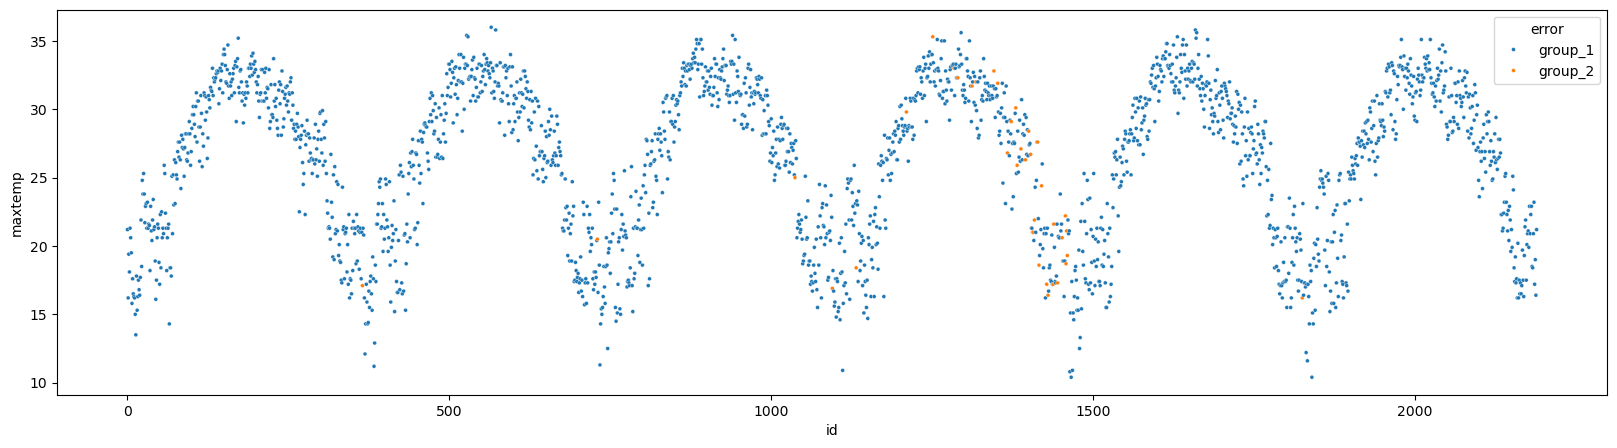

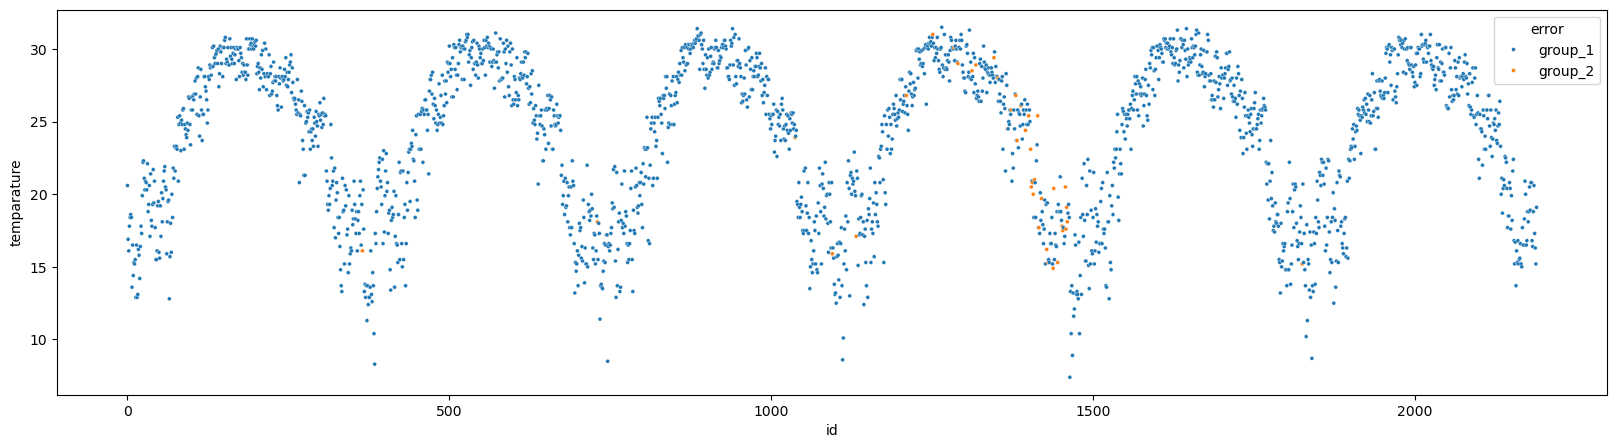

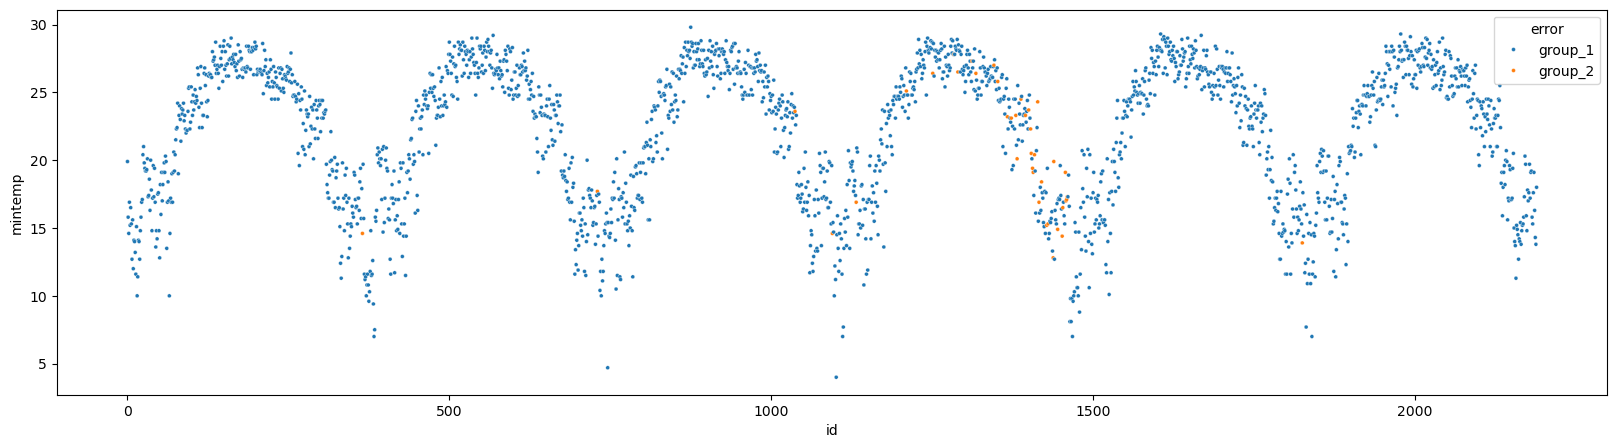

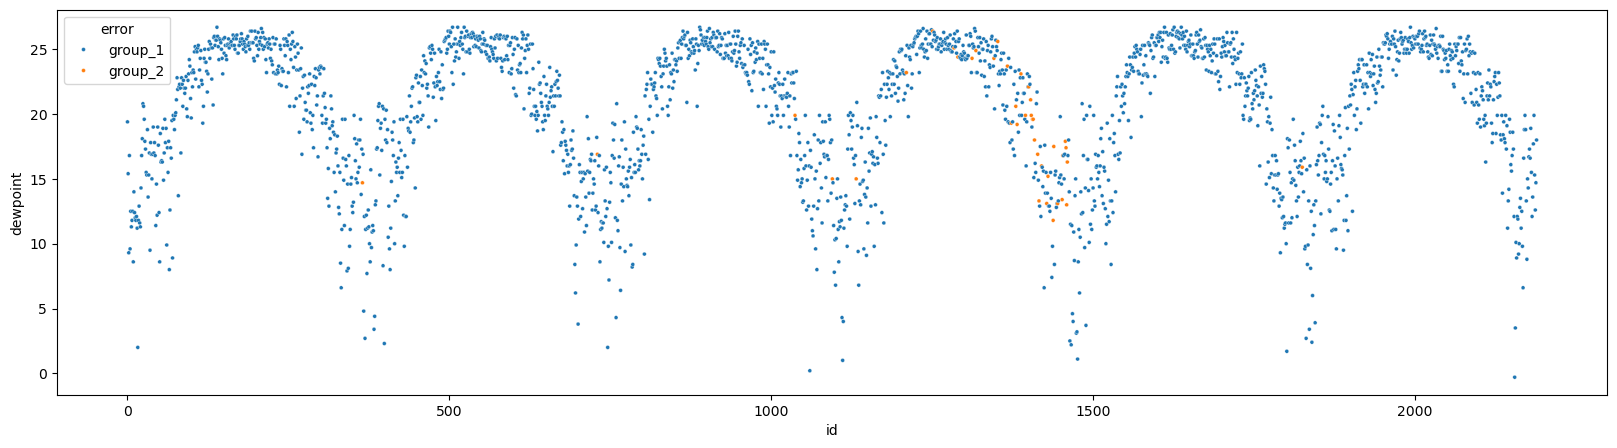

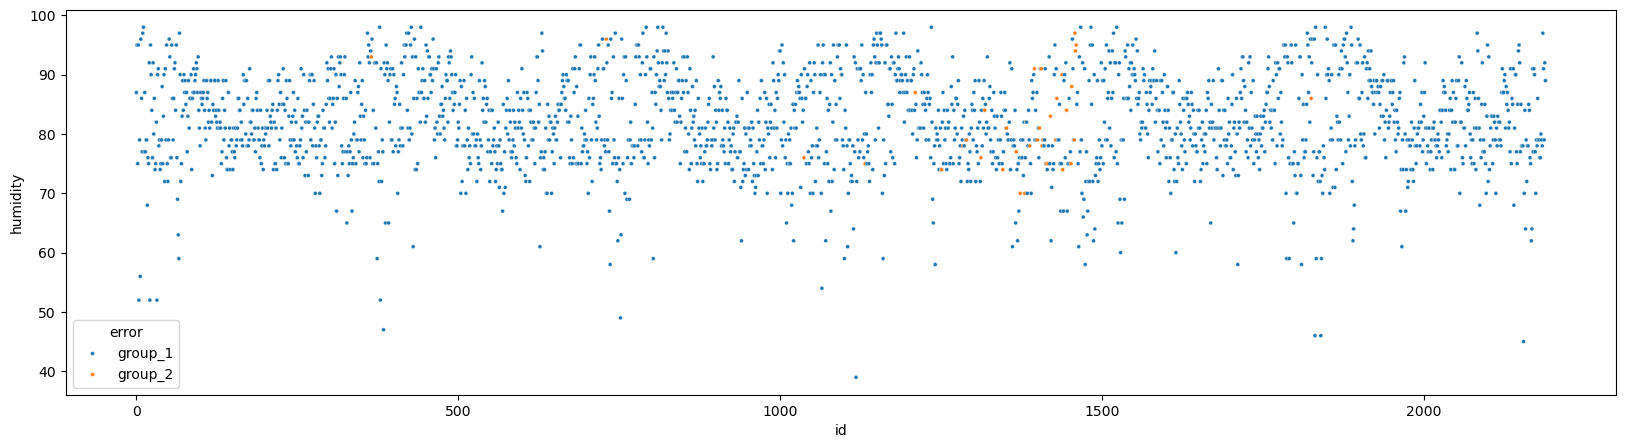

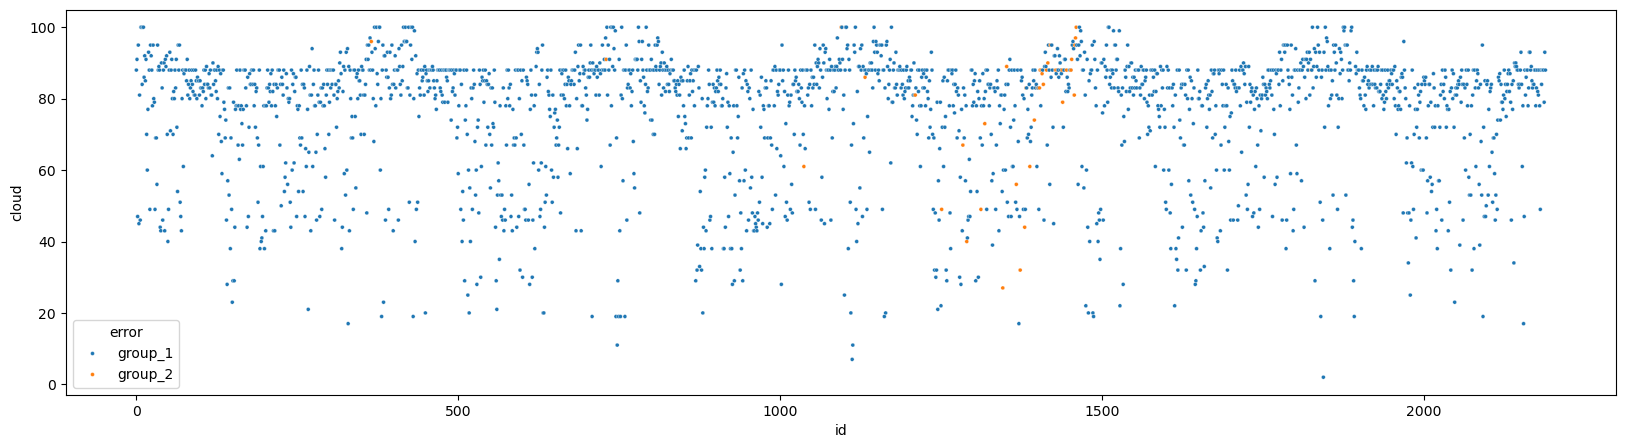

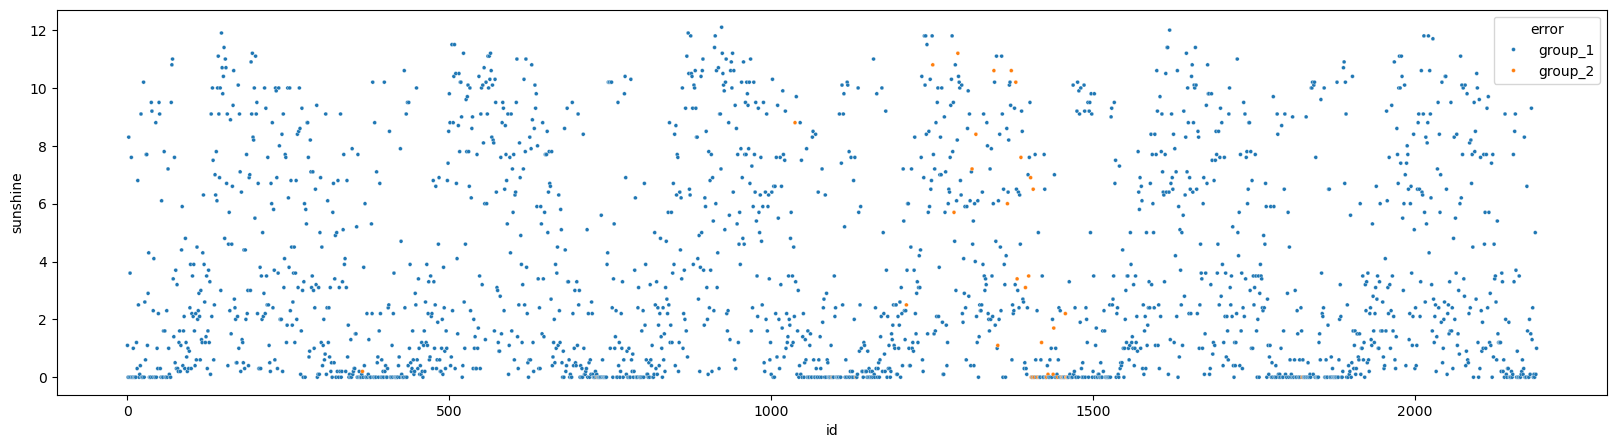

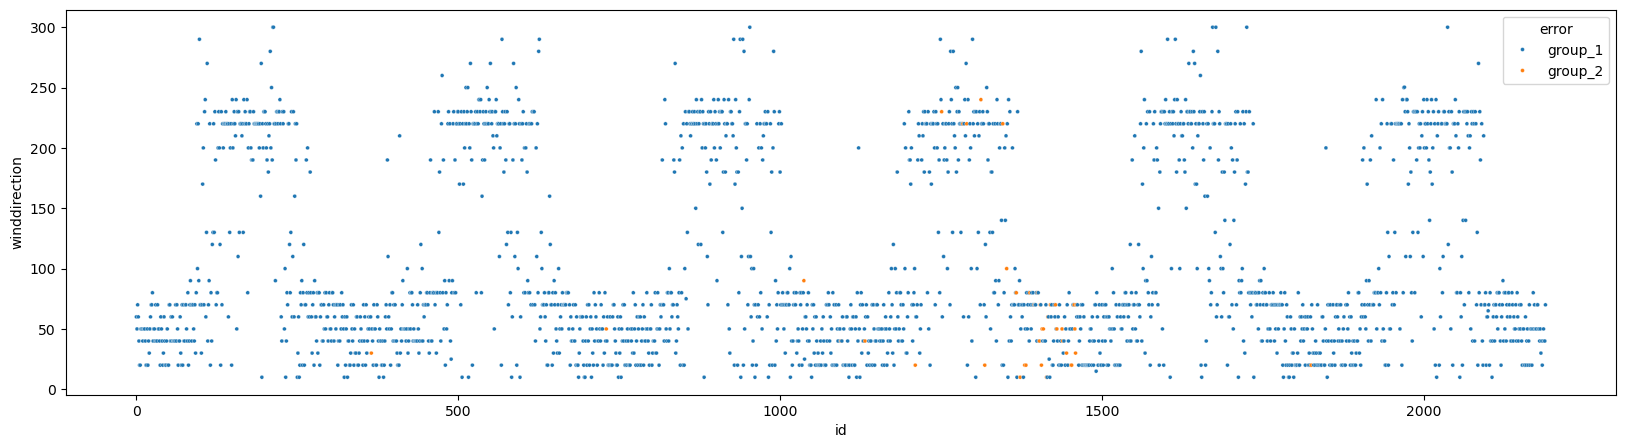

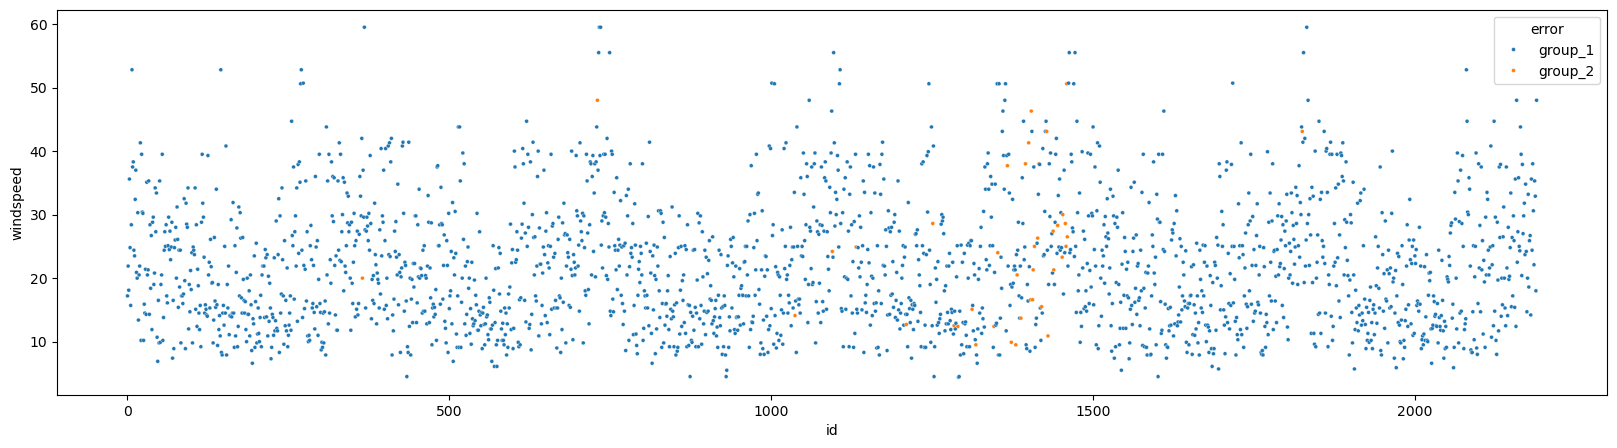

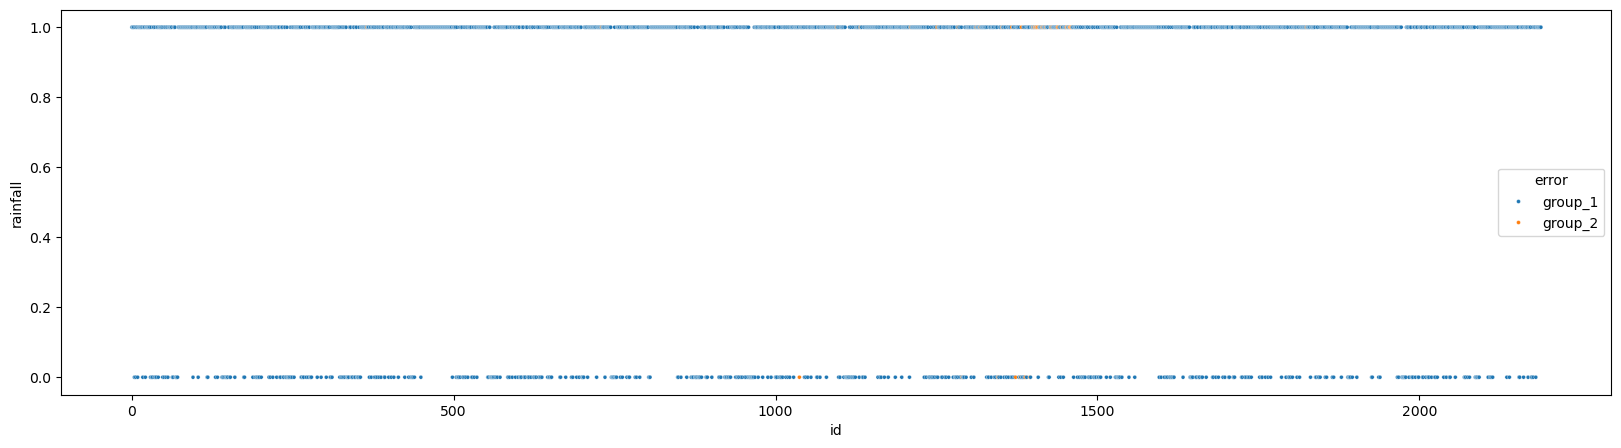

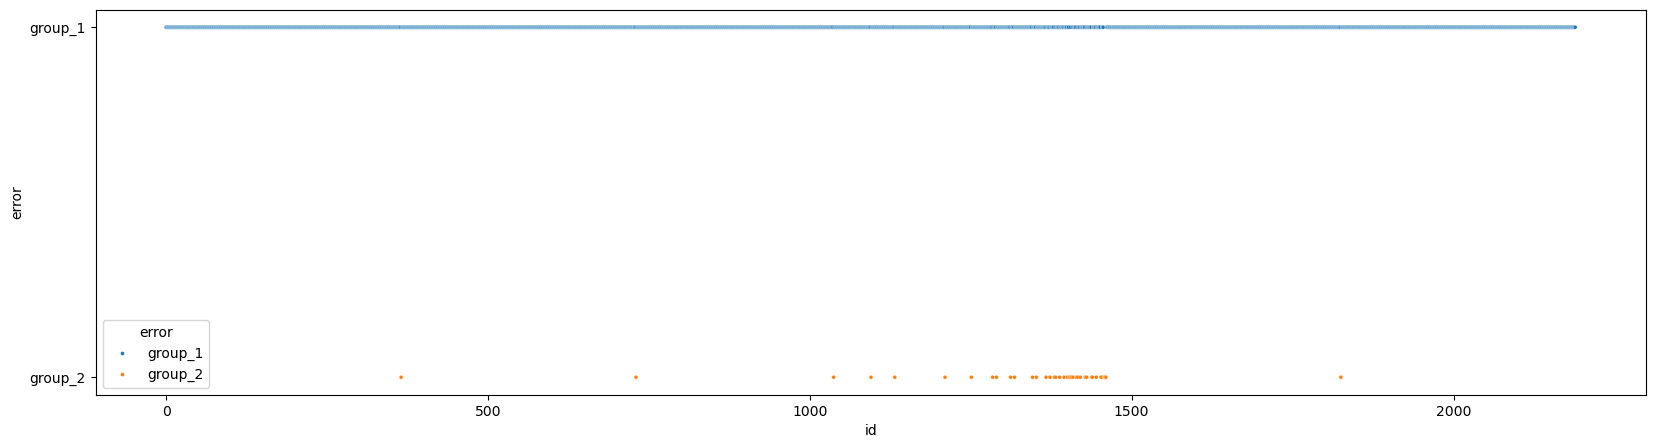

In [99]:
for i in train.columns:
    plt.figure(figsize=(20, 5))
    sns.scatterplot(data=train, x='id', y=i,hue='error',s=8)
    plt.show()


In [ ]:
train.f.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
